In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.3.1'

In [3]:
keras.__version__

'2.4.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [9]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
class_names = ["T-shirts/top", "Trouser", "Pullover", "Dress", "Coart",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coart'

In [11]:
class_names[y_train[1]]

'T-shirts/top'

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 1s 766us/step - loss: 0.7195 - accuracy: 0.7642 - val_loss: 0.5000 - val_accuracy: 0.8326
Epoch 2/30
1719/1719 [==============================] - 1s 715us/step - loss: 0.4892 - accuracy: 0.8291 - val_loss: 0.4580 - val_accuracy: 0.8416
Epoch 3/30
1719/1719 [==============================] - 1s 728us/step - loss: 0.4429 - accuracy: 0.8454 - val_loss: 0.4112 - val_accuracy: 0.8548
Epoch 4/30
1719/1719 [==============================] - 1s 723us/step - loss: 0.4148 - accuracy: 0.8551 - val_loss: 0.3975 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 1s 724us/step - loss: 0.3949 - accuracy: 0.8614 - val_loss: 0.3792 - val_accuracy: 0.8704
Epoch 6/30
1719/1719 [==============================] - 1s 728us/step - loss: 0.3786 - accuracy: 0.8668 - val_loss: 0.3800 - val_accuracy: 0.8670
Epoch 7/30
1719/1719 [==============================] - 1s 724us/step - loss: 0.3648 - accuracy: 0.8712 - val_loss: 0.3587 -

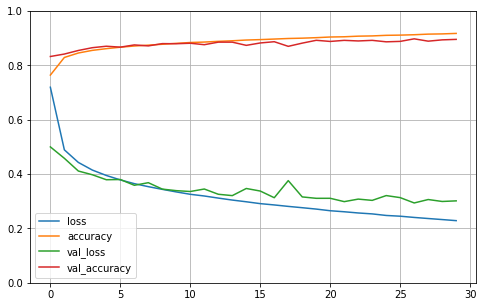

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 757us/step - loss: 76.1715 - accuracy: 0.8310


[76.1715316772461, 0.8309999704360962]

In [21]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [23]:
(model.predict(X_new) > 0.5).astype("int32")

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [24]:
y_pred = (model.predict(X_new) > 0.5).astype("int32")

In [25]:
y_pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [26]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

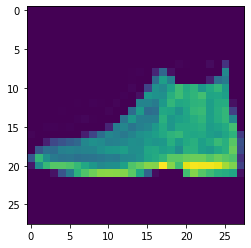

In [27]:
plt.imshow(X_new[0])

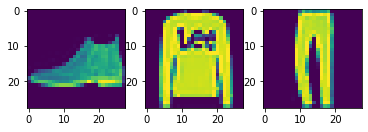

In [28]:
i=0
for img in X_new:
    i=i+1
    plt.subplot(1, 3, i)
    plt.imshow(img)